Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

Importing Dataset

In [2]:
df1=pd.read_csv("./Bengaluru_House_Data.csv")
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: './Bengaluru_House_Data.csv'

In [6]:
df1.shape #it shows the number of rows and number columns in our dataset

(13320, 9)

In [7]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum() #it will tell us the number of data missing in a column

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3=df2.dropna() #this is used to remove/drop all N/A values in our dataset
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]) ) 
#The code creates a new column, bhk, in the dataset, where it extracts and assigns the numerical value representing the number of bedrooms from the size column. It achieves this by splitting the values in the size column and applying a lambda function to convert the first part of the split (the bedroom count) into an integer before storing it in the bhk column

C:\Users\ragha\AppData\Local\Temp\ipykernel_16616\520022099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]) )


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df3[df3.bhk>20] #there is an error no house can 27 bedrooms with 8000sqft, cleaning has to be done

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique() #there is a range in the data(1133-1384), hence we will take the avg of these range

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # ~ this is a negate operation this will retrun me a dataframe

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('5544')


5544.0

In [22]:
convert_sqft_to_num('2100 - 2850')


2475.0

In [23]:
convert_sqft_to_num('34.46Sq. Meter')

In [24]:
df4= df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df4.loc[188]

location      KR Puram
size             2 BHK
total_sqft      1277.5
bath               2.0
price             56.8
bhk                  2
Name: 188, dtype: object

In [26]:
df4.loc[648]

location        Arekere
size          9 Bedroom
total_sqft          NaN
bath                9.0
price             265.0
bhk                   9
Name: 648, dtype: object

In [27]:
import re

def convert_to_sqm(value_with_unit):
    """
    Convert an area value (with unit) to square meters (sqm).

    Args:
    - value_with_unit (str or float): A string containing a numeric value followed by a unit 
      (e.g., '1000 sqft', '2 acres') or a float.

    Returns:
    - float: The area converted to square meters (sqm), or None if the format is invalid.
    """
    # Check if the value is already a float (i.e., already in sqm)
    if isinstance(value_with_unit, (float, int)):
        return float(value_with_unit)  # Return the value as is

    # Regular expression to capture numeric value (integer or float) and unit
    match = re.match(r"([\d,\.]+)([a-zA-Z]+)", value_with_unit.strip())
    if not match:
        return None  # Return None if the format is not recognized

    value = float(match.group(1).replace(',', ''))  # Extract and clean the numeric part
    unit = match.group(2).lower()   # Extract and lowercase the unit part

    # Conversion factors
    conversion_factors = {
        'sqft': 0.092903,      # 1 sqft = 0.092903 sqm
        'sqyd': 0.836127,      # 1 sqyd = 0.836127 sqm
        'acre': 4046.86,       # 1 acre = 4046.86 sqm
        'hectare': 10000,      # 1 hectare = 10000 sqm
        'sqm': 1,              # Already in sqm
        'sqkm': 1e6,           # 1 sqkm = 1,000,000 sqm
        'sqcm': 0.0001,        # 1 sqcm = 0.0001 sqm
        'sqmm': 0.000001,      # 1 sqmm = 0.000001 sqm
        'sqrd': 25.2929,       # 1 square rod = 25.2929 sqm
        'perch': 25.2929,      # 1 perch = 25.2929 sqm
        'rood': 1011.71,       # 1 rood = 1011.71 sqm
        'tsubo': 3.306,        # 1 tsubo = 3.306 sqm
        'are': 100,            # 1 are = 100 sqm
        'centiare': 1,         # 1 centiare = 1 sqm
        'gunta': 404.685642,   # 1 gunta = 404.685642 sqm
        'marla': 25.2929       # 1 marla = 25.2929 sqm
    }

    # Convert the value to square meters using the conversion factor
    if unit in conversion_factors:
        return value * conversion_factors[unit]
    else:
        return None  # If the unit is not supported, return None




In [28]:

df5 = df4.copy()
df5['total_sqft'] = df4['total_sqft'].apply(convert_to_sqm)
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [29]:
df5.loc[672]

location      Bettahalsoor
size             4 Bedroom
total_sqft          4046.0
bath                   4.0
price                445.0
bhk                      4
Name: 672, dtype: object

In [30]:
df6= df5.copy()
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
len(df6.location.unique()) #check vido3

1304

In [32]:
df6.location=df6.location.apply(lambda x: x.strip() )
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False) #gives us the no of location present in a particular area
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [33]:
len(location_stats[location_stats<=10]) # to know the no of locations less or equal to 10

1052

In [34]:
# storing locations less than 10 in other variable
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10



location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [35]:
len(df6.location.unique())

1293

In [36]:
df6.location = df6.location.apply(lambda X: 'others' if X in location_stats_less_than_10 else X)
len(df6.location.unique())


242

In [37]:
df6.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [38]:
df6[df6.total_sqft/df6.bhk<300].head(10) #there are outlires in the dataset and has to be removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,others,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [39]:
df6.shape

(13246, 7)

In [40]:
df7=df6[~ (df6.total_sqft/df6.bhk<300)]
df7.shape

(12502, 7)

In [41]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:

def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # Initialize an empty DataFrame

    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)  # Calculate the mean
        st = np.std(subdf.price_per_sqft)   # Calculate the standard deviation
        # Filter out outliers based on the mean and standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)  # Concatenate the reduced DataFrame

    return df_out  # Return the DataFrame without outliers


In [43]:
df8= remove_pps_outliers(df7)
df8.shape

(10241, 7)

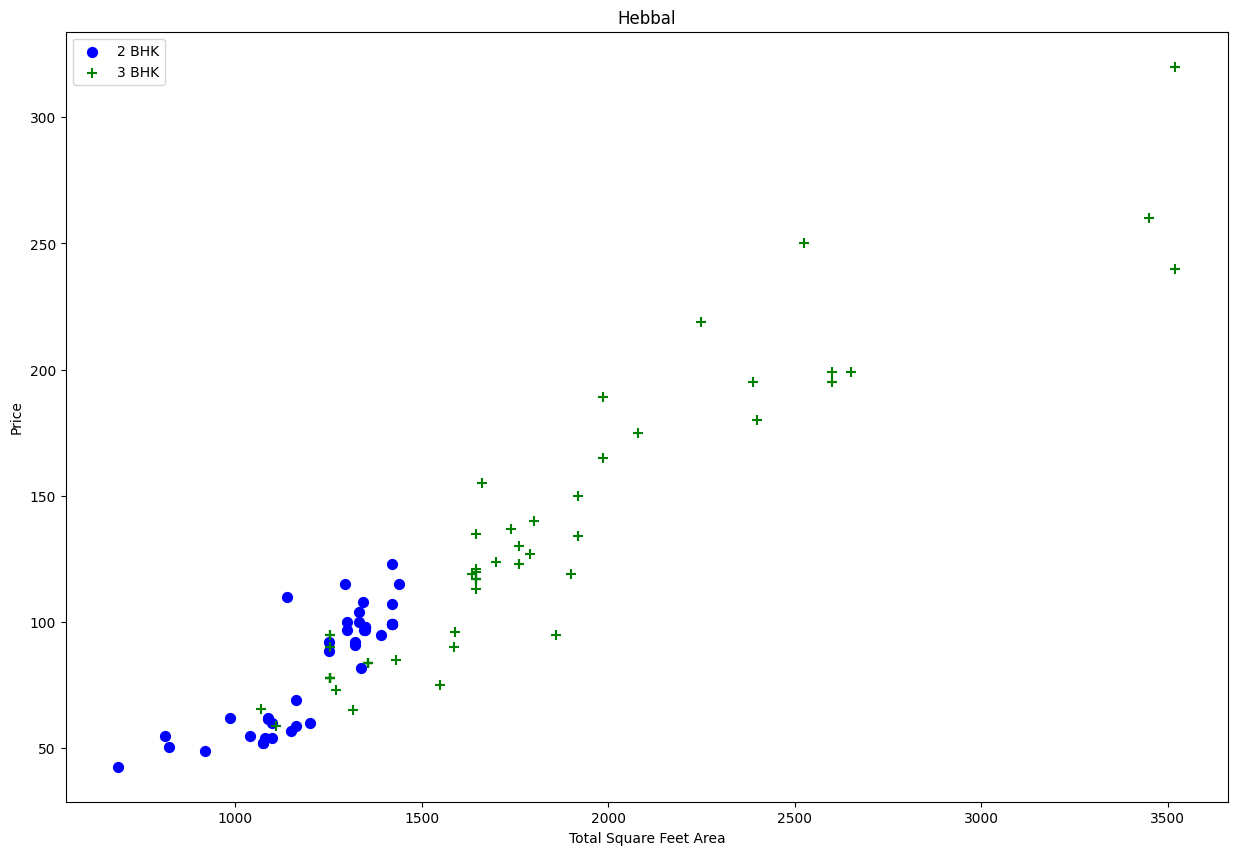

In [44]:

def plot_scatter_chart(df, location):
    # Filter data for 2 BHK and 3 BHK
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    # Set figure size
    matplotlib.rcParams['figure.figsize'] = (15, 10)

    # Plot scatter charts
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)

    # Set labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)

    # Show legend
    plt.legend()
    
plot_scatter_chart(df8,"Hebbal")


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, l.e.

{
    '1': {

        mean': 4000,

        'std: 2000,

        'count': 34

},
    '2': {

        mean': 4300,

        'std: 2300,

        'count': 22
    },

}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [45]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])  # Initialize an empty array for indices to exclude

    # Group by location
    for location, location_df in df.groupby('location'):
        bhk_stats = {}  # Dictionary to store BHK statistics

        # Group by BHK and calculate statistics
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), 
                'std': np.std(bhk_df.price_per_sqft), 
                'count': bhk_df.shape[0]
            }

        # Identify outliers for each BHK
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)  # Get statistics for the previous BHK
            if stats and stats['count'] > 5:
                # Append indices of outliers to the exclude_indices array
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    # Drop the excluded indices from the original DataFrame
    return df.drop(exclude_indices, axis='index')

# Usage
df9 = remove_bhk_outliers(df8)
df9.shape


(7329, 7)

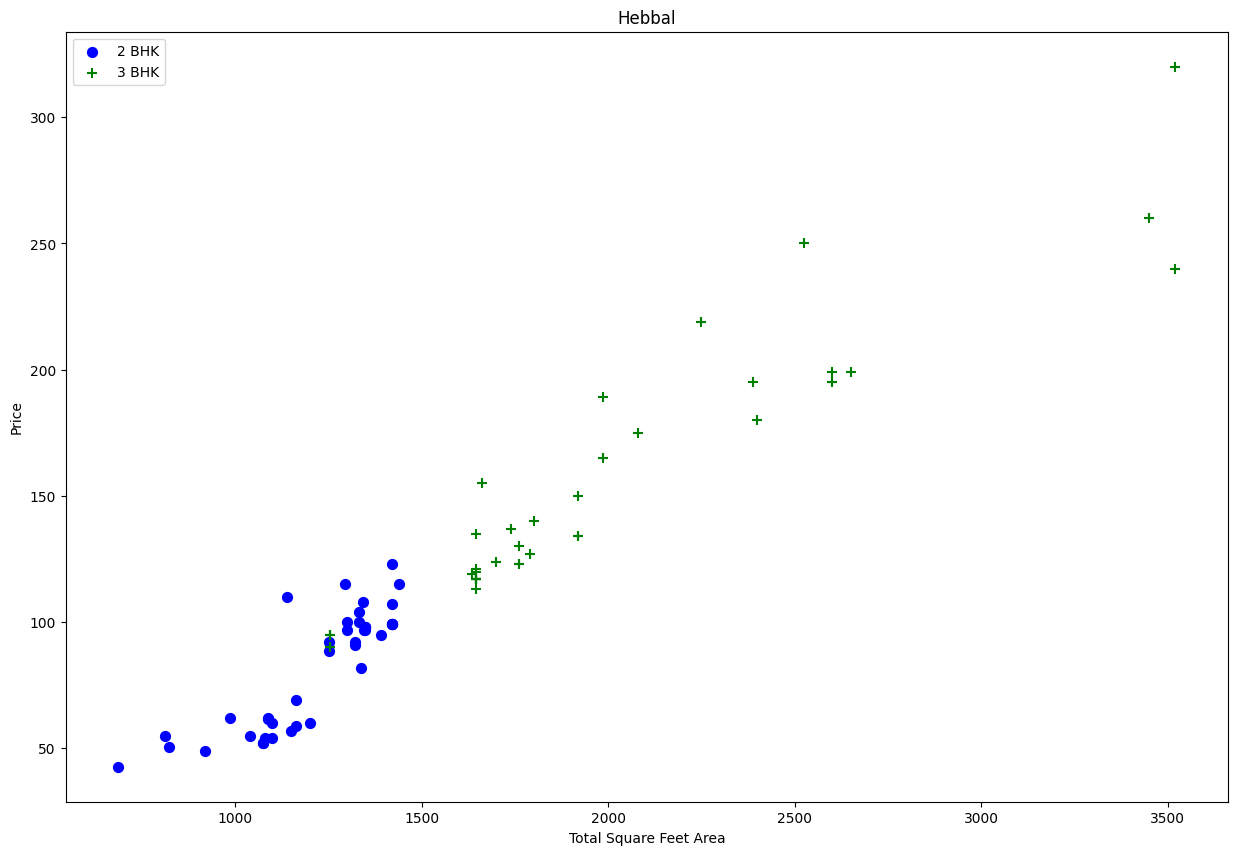

In [46]:
plot_scatter_chart(df9,"Hebbal")

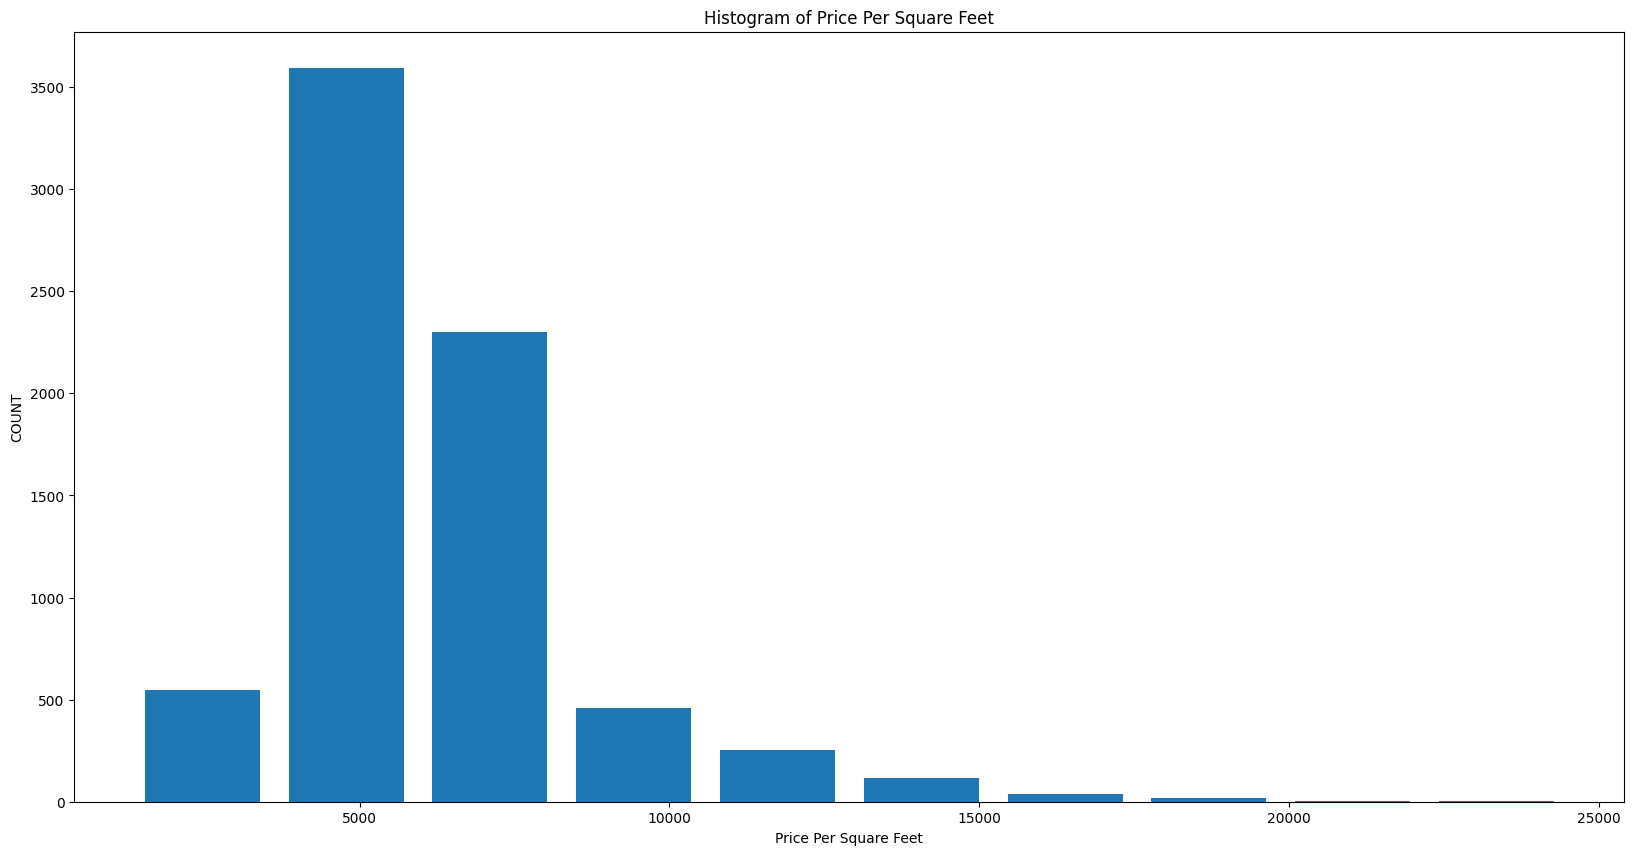

In [47]:

# Set the figure size correctly
matplotlib.rcParams["figure.figsize"] = (20, 10)

# Create the histogram
plt.hist(df9.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("COUNT")
plt.title("Histogram of Price Per Square Feet")  # Optional: Add a title
plt.show()


In [48]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [49]:
df9[df9.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'COUNT')

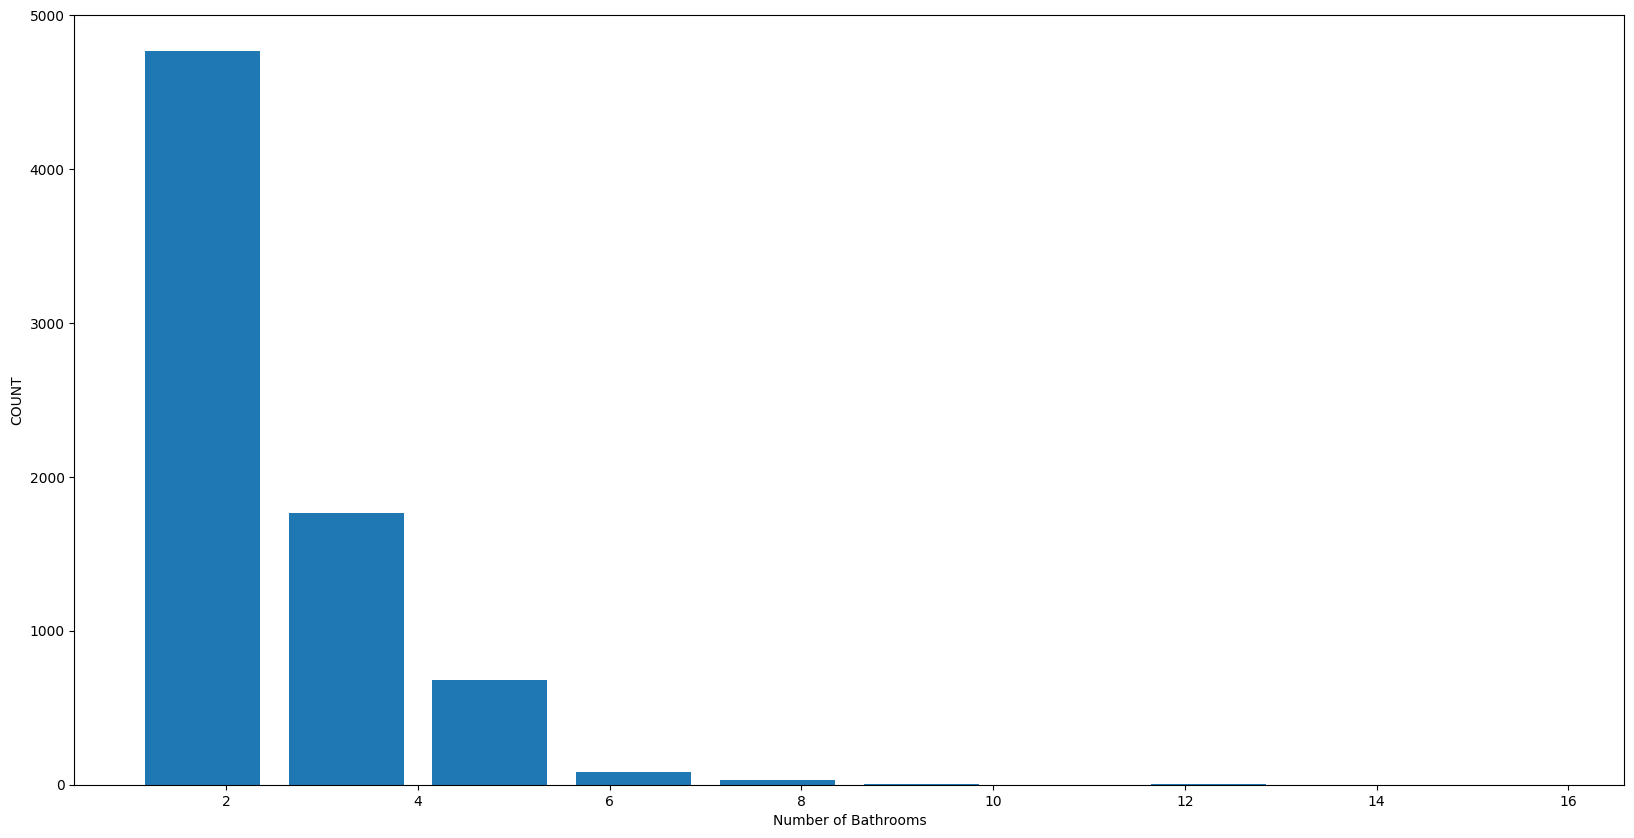

In [50]:
plt.hist(df9.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("COUNT")

In [51]:
df9[df9.bath>df9.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [52]:
df10=df9[df9.bath<df9.bhk+2]
df10.shape

(7251, 7)

In [53]:
df11=df10.drop(['size','price_per_sqft'],axis='columns')
df11.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [54]:
dummies=pd.get_dummies(df11.location) #Another way of one hot encoding
dummies.head(8)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df12=pd.concat([df11,dummies.drop('others',axis='columns')],axis='columns') #To avoid dummy variable trap we drop one column
df12.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df13=df12.drop('location',axis='columns')
df13.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df13.shape

(7251, 245)

In [58]:
X = df13.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
y = df13.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train ,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874337

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv) #learn this

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [63]:

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.819001,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.687468,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.725276,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [64]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [65]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= bhk
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar',1000,2,3)

C:\Users\ragha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(81.72616900765911)

In [67]:
import pickle
with open('NextGen_Prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns ={
    'data_columns': [col.lower() for col in X.columns]

}
with open("NextGen_columns_data.json","w") as f:
    f.write(json.dumps(columns))